In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Set style for visualizations
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)
print("Libraries imported successfully!")

Libraries imported successfully!


In [6]:
# Load the dataset
df = pd.read_csv(r'c:\Users\Admin\OneDrive\Desktop\EDA\Sales Dataset.csv')

# Display basic information
print("Dataset Shape:", df.shape)
print("\n" + "="*80)
print("First 5 Rows of Dataset:")
print("="*80)
print(df.head())

print("\n" + "="*80)
print("Data Types:")
print("="*80)
print(df.dtypes)

print("\n" + "="*80)
print("Missing Values:")
print("="*80)
print(df.isnull().sum())

print("\n" + "="*80)
print("Column Information:")
print("="*80)
df.info()

Dataset Shape: (1194, 12)

First 5 Rows of Dataset:
  Order ID  Amount  Profit  Quantity     Category      Sub-Category  \
0  B-26776    9726    1275         5  Electronics  Electronic Games   
1  B-26776    9726    1275         5  Electronics  Electronic Games   
2  B-26776    9726    1275         5  Electronics  Electronic Games   
3  B-26776    4975    1330        14  Electronics          Printers   
4  B-26776    4975    1330        14  Electronics          Printers   

  PaymentMode  Order Date   CustomerName     State     City Year-Month  
0         UPI  2023-06-27  David Padilla   Florida    Miami    2023-06  
1         UPI  2024-12-27  Connor Morgan  Illinois  Chicago    2024-12  
2         UPI  2021-07-25   Robert Stone  New York  Buffalo    2021-07  
3         UPI  2023-06-27  David Padilla   Florida    Miami    2023-06  
4         UPI  2024-12-27  Connor Morgan  Illinois  Chicago    2024-12  

Data Types:
Order ID        object
Amount           int64
Profit           int64
Q

In [7]:
# Identify numerical columns
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print("Numerical Columns:", numerical_cols)

print("\n" + "="*80)
print("COMPREHENSIVE SUMMARY STATISTICS FOR NUMERICAL FIELDS")
print("="*80)

# Detailed summary statistics
summary_stats = df[numerical_cols].describe().T
summary_stats['median'] = df[numerical_cols].median()
summary_stats['variance'] = df[numerical_cols].var()
summary_stats['skewness'] = df[numerical_cols].skew()
summary_stats['kurtosis'] = df[numerical_cols].kurtosis()

print(summary_stats.round(4))

# Calculate correlation matrix for numerical fields
print("\n" + "="*80)
print("CORRELATION MATRIX - Numerical Fields:")
print("="*80)
correlation_matrix = df[numerical_cols].corr()
print(correlation_matrix.round(4))

# Summary statistics for each numerical field
print("\n" + "="*80)
print("DETAILED STATISTICS FOR EACH NUMERICAL FIELD:")
print("="*80)
for col in numerical_cols:
    print(f"\n{col}:")
    print(f"  Mean: {df[col].mean():.2f}")
    print(f"  Median: {df[col].median():.2f}")
    print(f"  Mode: {df[col].mode().values[0]:.2f}" if len(df[col].mode()) > 0 else f"  Mode: N/A")
    print(f"  Std Dev: {df[col].std():.2f}")
    print(f"  Min: {df[col].min():.2f}")
    print(f"  Max: {df[col].max():.2f}")
    print(f"  Range: {df[col].max() - df[col].min():.2f}")
    print(f"  IQR: {df[col].quantile(0.75) - df[col].quantile(0.25):.2f}")
    print(f"  Skewness: {df[col].skew():.4f}")
    print(f"  Kurtosis: {df[col].kurtosis():.4f}")

Numerical Columns: ['Amount', 'Profit', 'Quantity']

COMPREHENSIVE SUMMARY STATISTICS FOR NUMERICAL FIELDS
           count       mean        std    min     25%     50%     75%     max  \
Amount    1194.0  5178.0896  2804.9220  508.0  2799.0  5152.0  7626.0  9992.0   
Profit    1194.0  1348.9925  1117.9926   50.0   410.0  1014.0  2035.0  4930.0   
Quantity  1194.0    10.6742     5.7771    1.0     6.0    11.0    16.0    20.0   

          median      variance  skewness  kurtosis  
Amount    5152.0  7.867587e+06    0.0536   -1.1843  
Profit    1014.0  1.249907e+06    0.9436    0.0482  
Quantity    11.0  3.337490e+01   -0.0379   -1.2266  

CORRELATION MATRIX - Numerical Fields:
          Amount  Profit  Quantity
Amount    1.0000  0.6753    0.0446
Profit    0.6753  1.0000    0.0661
Quantity  0.0446  0.0661    1.0000

DETAILED STATISTICS FOR EACH NUMERICAL FIELD:

Amount:
  Mean: 5178.09
  Median: 5152.00
  Mode: 508.00
  Std Dev: 2804.92
  Min: 508.00
  Max: 9992.00
  Range: 9484.00
  IQR:

In [8]:
# Identify categorical columns (excluding dates and IDs)
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
# Remove Order ID and Order Date from categorical analysis
categorical_cols = [col for col in categorical_cols if col not in ['Order ID', 'Order Date', 'CustomerName']]

print("Key Categorical Columns for Analysis:", categorical_cols)

print("\n" + "="*80)
print("COMPREHENSIVE SUMMARY STATISTICS FOR CATEGORICAL FIELDS")
print("="*80)

for col in categorical_cols:
    print(f"\n{col}:")
    print(f"  Unique Values: {df[col].nunique()}")
    print(f"  Mode: {df[col].mode().values[0]}")
    print(f"  Missing Values: {df[col].isnull().sum()}")
    print(f"\n  Top 10 Value Counts:")
    value_counts = df[col].value_counts().head(10)
    for idx, (val, count) in enumerate(value_counts.items(), 1):
        percentage = (count / len(df)) * 100
        print(f"    {idx}. {val}: {count} ({percentage:.2f}%)")

# Summary table for categorical fields
print("\n" + "="*80)
print("CATEGORICAL FIELDS SUMMARY TABLE:")
print("="*80)
categorical_summary = pd.DataFrame({
    'Column': categorical_cols,
    'Unique_Values': [df[col].nunique() for col in categorical_cols],
    'Mode': [df[col].mode().values[0] for col in categorical_cols],
    'Missing_Values': [df[col].isnull().sum() for col in categorical_cols]
})
print(categorical_summary)

Key Categorical Columns for Analysis: ['Category', 'Sub-Category', 'PaymentMode', 'State', 'City', 'Year-Month']

COMPREHENSIVE SUMMARY STATISTICS FOR CATEGORICAL FIELDS

Category:
  Unique Values: 3
  Mode: Furniture
  Missing Values: 0

  Top 10 Value Counts:
    1. Furniture: 407 (34.09%)
    2. Office Supplies: 399 (33.42%)
    3. Electronics: 388 (32.50%)

Sub-Category:
  Unique Values: 12
  Mode: Tables
  Missing Values: 0

  Top 10 Value Counts:
    1. Tables: 122 (10.22%)
    2. Pens: 114 (9.55%)
    3. Sofas: 114 (9.55%)
    4. Markers: 110 (9.21%)
    5. Electronic Games: 104 (8.71%)
    6. Paper: 104 (8.71%)
    7. Phones: 101 (8.46%)
    8. Printers: 95 (7.96%)
    9. Laptops: 88 (7.37%)
    10. Bookcases: 88 (7.37%)

PaymentMode:
  Unique Values: 5
  Mode: Debit Card
  Missing Values: 0

  Top 10 Value Counts:
    1. Debit Card: 260 (21.78%)
    2. Credit Card: 258 (21.61%)
    3. UPI: 252 (21.11%)
    4. EMI: 218 (18.26%)
    5. COD: 206 (17.25%)

State:
  Unique Values: 

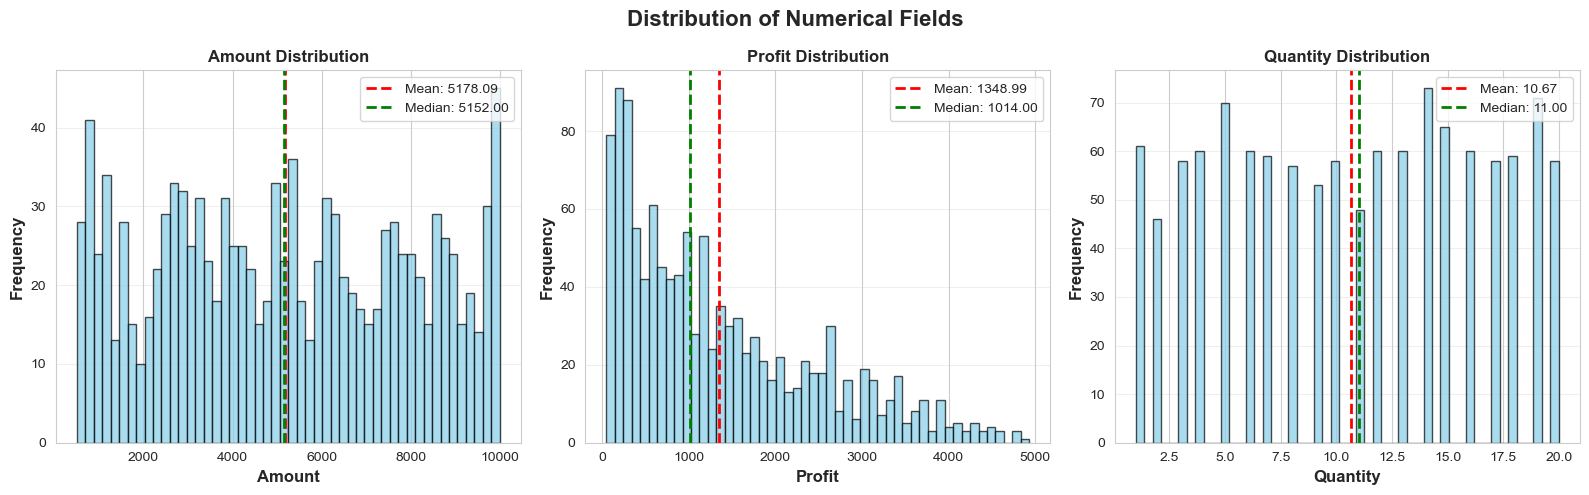

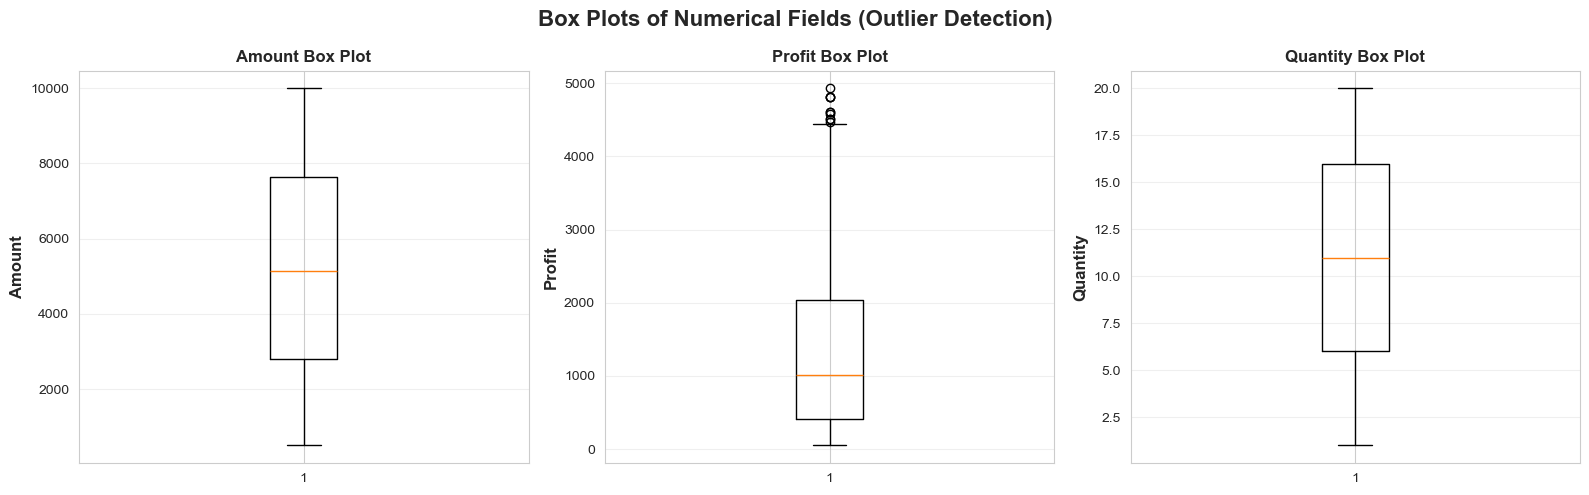

In [9]:
# Create histograms for numerical fields
fig, axes = plt.subplots(1, 3, figsize=(16, 5))
fig.suptitle('Distribution of Numerical Fields', fontsize=16, fontweight='bold')

for idx, col in enumerate(numerical_cols):
    axes[idx].hist(df[col], bins=50, color='skyblue', edgecolor='black', alpha=0.7)
    axes[idx].set_xlabel(col, fontsize=12, fontweight='bold')
    axes[idx].set_ylabel('Frequency', fontsize=12, fontweight='bold')
    axes[idx].set_title(f'{col} Distribution', fontsize=12, fontweight='bold')
    axes[idx].grid(axis='y', alpha=0.3)
    
    # Add mean and median lines
    mean_val = df[col].mean()
    median_val = df[col].median()
    axes[idx].axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.2f}')
    axes[idx].axvline(median_val, color='green', linestyle='--', linewidth=2, label=f'Median: {median_val:.2f}')
    axes[idx].legend()

plt.tight_layout()
plt.show()

# Box plots for numerical fields to identify outliers
fig, axes = plt.subplots(1, 3, figsize=(16, 5))
fig.suptitle('Box Plots of Numerical Fields (Outlier Detection)', fontsize=16, fontweight='bold')

for idx, col in enumerate(numerical_cols):
    axes[idx].boxplot(df[col], vert=True)
    axes[idx].set_ylabel(col, fontsize=12, fontweight='bold')
    axes[idx].set_title(f'{col} Box Plot', fontsize=12, fontweight='bold')
    axes[idx].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

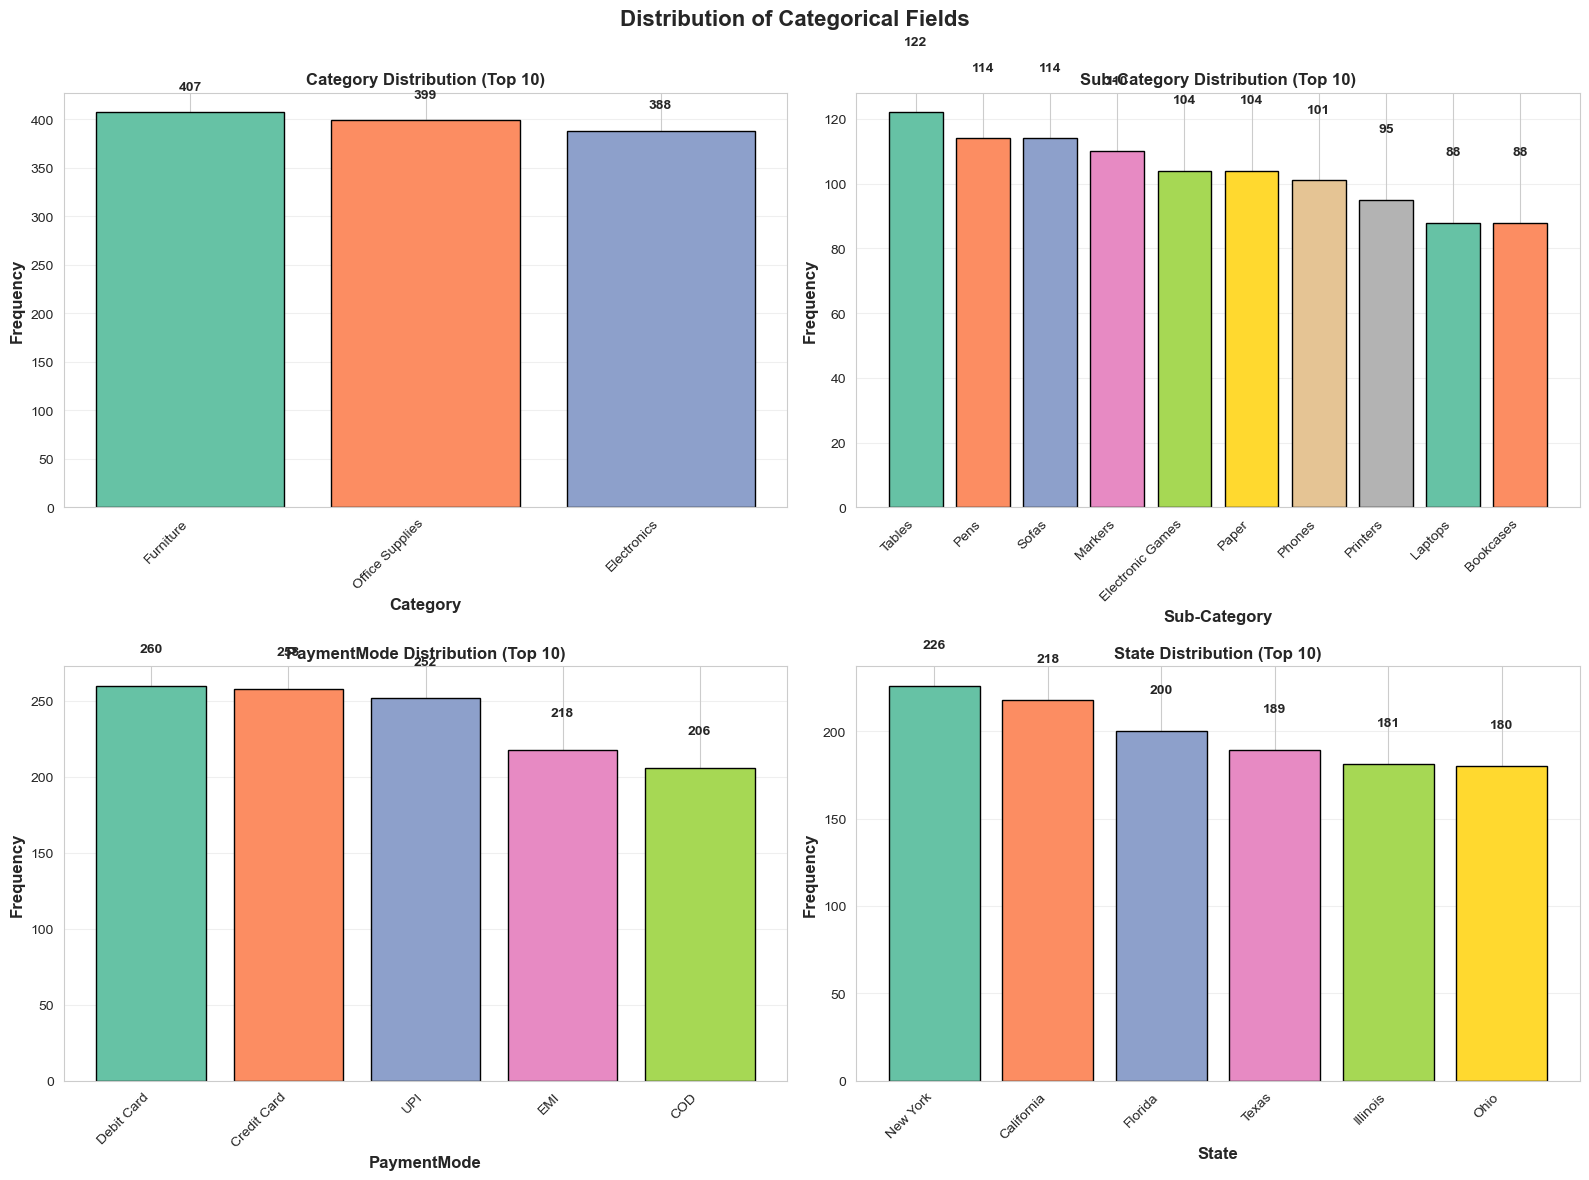

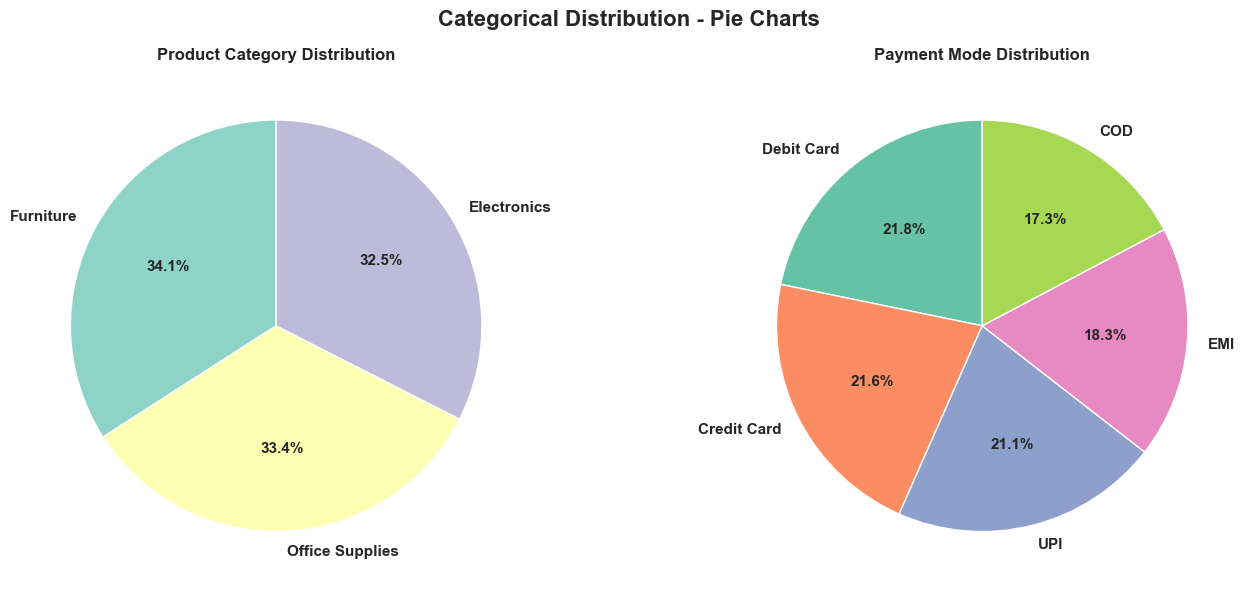

In [10]:
# Create bar charts for categorical fields
categories_to_plot = ['Category', 'Sub-Category', 'PaymentMode', 'State']

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Distribution of Categorical Fields', fontsize=16, fontweight='bold')
axes = axes.ravel()

for idx, col in enumerate(categories_to_plot):
    value_counts = df[col].value_counts().head(10)
    colors = sns.color_palette('Set2', len(value_counts))
    axes[idx].bar(range(len(value_counts)), value_counts.values, color=colors, edgecolor='black')
    axes[idx].set_xticks(range(len(value_counts)))
    axes[idx].set_xticklabels(value_counts.index, rotation=45, ha='right')
    axes[idx].set_xlabel(col, fontsize=12, fontweight='bold')
    axes[idx].set_ylabel('Frequency', fontsize=12, fontweight='bold')
    axes[idx].set_title(f'{col} Distribution (Top 10)', fontsize=12, fontweight='bold')
    axes[idx].grid(axis='y', alpha=0.3)
    
    # Add value labels on bars
    for i, v in enumerate(value_counts.values):
        axes[idx].text(i, v + 20, str(v), ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

# Pie chart for Category distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
fig.suptitle('Categorical Distribution - Pie Charts', fontsize=16, fontweight='bold')

# Category pie chart
category_counts = df['Category'].value_counts()
colors1 = sns.color_palette('Set3', len(category_counts))
axes[0].pie(category_counts.values, labels=category_counts.index, autopct='%1.1f%%', 
            colors=colors1, startangle=90, textprops={'fontsize': 11, 'fontweight': 'bold'})
axes[0].set_title('Product Category Distribution', fontsize=12, fontweight='bold')

# PaymentMode pie chart
payment_counts = df['PaymentMode'].value_counts()
colors2 = sns.color_palette('Set2', len(payment_counts))
axes[1].pie(payment_counts.values, labels=payment_counts.index, autopct='%1.1f%%', 
            colors=colors2, startangle=90, textprops={'fontsize': 11, 'fontweight': 'bold'})
axes[1].set_title('Payment Mode Distribution', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

In [11]:
print("="*80)
print("KEY INSIGHTS AND INTERPRETATIONS")
print("="*80)

print("\n### NUMERICAL FIELDS ANALYSIS ###\n")

print("1. AMOUNT Distribution:")
print(f"   - Range: ${df['Amount'].min():.2f} to ${df['Amount'].max():.2f}")
print(f"   - Mean: ${df['Amount'].mean():.2f}")
print(f"   - Median: ${df['Amount'].median():.2f}")
skewness_amount = df['Amount'].skew()
print(f"   - Skewness: {skewness_amount:.4f} ({'Right-skewed (positive)' if skewness_amount > 0 else 'Left-skewed (negative)'})")
print(f"   - Interpretation: {('Values tend to extend more on the right side with some high outliers.' if skewness_amount > 0 else 'Values tend to extend more on the left side.')}")

print("\n2. PROFIT Distribution:")
print(f"   - Range: ${df['Profit'].min():.2f} to ${df['Profit'].max():.2f}")
print(f"   - Mean: ${df['Profit'].mean():.2f}")
print(f"   - Median: ${df['Profit'].median():.2f}")
skewness_profit = df['Profit'].skew()
print(f"   - Skewness: {skewness_profit:.4f}")
print(f"   - Interpretation: {('Profits show some high-value transactions.' if skewness_profit > 0 else 'Profits appear relatively balanced.')}")

print("\n3. QUANTITY Distribution:")
print(f"   - Range: {df['Quantity'].min()} to {df['Quantity'].max()} units")
print(f"   - Mean: {df['Quantity'].mean():.2f} units")
print(f"   - Median: {df['Quantity'].median():.2f} units")
print(f"   - Most common quantity: {df['Quantity'].mode().values[0]} units")

# Outlier analysis
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
    if len(outliers) > 0:
        print(f"\n   Outliers in {col}: {len(outliers)} values detected ({(len(outliers)/len(df)*100):.2f}%)")

print("\n" + "="*80)
print("### CATEGORICAL FIELDS ANALYSIS ###\n")

print("1. Category Distribution:")
category_dist = df['Category'].value_counts()
for cat, count in category_dist.items():
    percentage = (count / len(df)) * 100
    print(f"   - {cat}: {count} ({percentage:.2f}%)")

print("\n2. Top Payment Modes:")
payment_dist = df['PaymentMode'].value_counts().head(5)
for mode, count in payment_dist.items():
    percentage = (count / len(df)) * 100
    print(f"   - {mode}: {count} ({percentage:.2f}%)")

print("\n3. Geographic Distribution (Top 5 States):")
state_dist = df['State'].value_counts().head(5)
for state, count in state_dist.items():
    percentage = (count / len(df)) * 100
    print(f"   - {state}: {count} ({percentage:.2f}%)")

print("\n4. Sub-Category Analysis (Top 5):")
subcat_dist = df['Sub-Category'].value_counts().head(5)
for subcat, count in subcat_dist.items():
    percentage = (count / len(df)) * 100
    print(f"   - {subcat}: {count} ({percentage:.2f}%)")

print("\n" + "="*80)
print("### KEY FINDINGS AND ANOMALIES ###\n")

# Profit margin analysis
df['Profit_Margin'] = (df['Profit'] / df['Amount'] * 100)
print(f"1. Profit Margin Analysis:")
print(f"   - Average Profit Margin: {df['Profit_Margin'].mean():.2f}%")
print(f"   - Median Profit Margin: {df['Profit_Margin'].median():.2f}%")
print(f"   - Min Profit Margin: {df['Profit_Margin'].min():.2f}%")
print(f"   - Max Profit Margin: {df['Profit_Margin'].max():.2f}%")

# Category-wise profit analysis
print(f"\n2. Profit by Category:")
for category in df['Category'].unique():
    avg_profit = df[df['Category'] == category]['Profit'].mean()
    total_profit = df[df['Category'] == category]['Profit'].sum()
    print(f"   - {category}: Avg Profit: ${avg_profit:.2f}, Total: ${total_profit:.2f}")

# Amount and Quantity relationship
correlation = df['Amount'].corr(df['Quantity'])
print(f"\n3. Correlation Analysis:")
print(f"   - Amount vs Quantity Correlation: {correlation:.4f}")
print(f"     Interpretation: {'Strong positive correlation' if abs(correlation) > 0.7 else 'Moderate correlation' if abs(correlation) > 0.4 else 'Weak correlation'}")

print("\n" + "="*80)

KEY INSIGHTS AND INTERPRETATIONS

### NUMERICAL FIELDS ANALYSIS ###

1. AMOUNT Distribution:
   - Range: $508.00 to $9992.00
   - Mean: $5178.09
   - Median: $5152.00
   - Skewness: 0.0536 (Right-skewed (positive))
   - Interpretation: Values tend to extend more on the right side with some high outliers.

2. PROFIT Distribution:
   - Range: $50.00 to $4930.00
   - Mean: $1348.99
   - Median: $1014.00
   - Skewness: 0.9436
   - Interpretation: Profits show some high-value transactions.

3. QUANTITY Distribution:
   - Range: 1 to 20 units
   - Mean: 10.67 units
   - Median: 11.00 units
   - Most common quantity: 14 units

   Outliers in Profit: 10 values detected (0.84%)

### CATEGORICAL FIELDS ANALYSIS ###

1. Category Distribution:
   - Furniture: 407 (34.09%)
   - Office Supplies: 399 (33.42%)
   - Electronics: 388 (32.50%)

2. Top Payment Modes:
   - Debit Card: 260 (21.78%)
   - Credit Card: 258 (21.61%)
   - UPI: 252 (21.11%)
   - EMI: 218 (18.26%)
   - COD: 206 (17.25%)

3. Geogra